<a href="https://colab.research.google.com/github/Avr8/Spam_Classifier/blob/main/Spam_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import nltk

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

**CONNECTING TO GOOGLE DRIVE**

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive')
print("We are currently in the folder of ",os.getcwd())

We are currently in the folder of  /content/drive/MyDrive


**READING DATASET**

In [ ]:
messages = pd.read_csv('/content/drive/MyDrive/SMSSpamCollection',sep='\t',names=["label","message"])
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


**TEXT PREPROCESSING**

In [ ]:
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]
for i in range(0,len(messages)):
  review=re.sub('[^a-zA-Z]',' ',messages['message'][i])
  review=review.lower()
  review=review.split()

  review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
  review=' '.join(review)
  corpus.append(review)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
corpus[5]

'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv'

**USING BAG OF WORDS**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000)
x=cv.fit_transform(corpus).toarray()


**USING TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(max_features=1000)
x=cv.fit_transform(corpus).toarray()

**MAKING OUTPUT FEATURE** 

In [ ]:
y=pd.get_dummies(messages['label'])
y=y.iloc[:,1].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

**TEST TRAIN SPLIT**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)


**NAIVE BAYES CLASSIFIER**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model=MultinomialNB().fit(X_train,y_train)

y_pred=spam_detect_model.predict(X_test)
print(y_pred)
print(y_test)

[0 1 0 ... 0 1 0]
[0 1 0 ... 0 1 0]


**CONFUSION** **MATRIX**

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
confusion_m

array([[952,   3],
       [ 21, 139]])

***CHECKING ACCURACY SCORE***

In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
acc

0.97847533632287

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,y_pred)
f1

0.9205298013245032

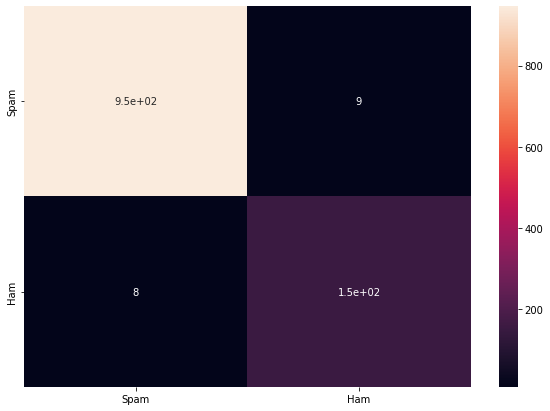

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(confusion_m, index = ['Spam','Ham'],
                  columns = ['Spam','Ham'])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)